In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [8]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a connection to the database
database_path = "Resources/hawaii.sqlite"
connection_str = f"sqlite:///{database_path}"
print(connection_str)

engine = create_engine(connection_str)

sqlite:///Resources/hawaii.sqlite


In [9]:
# create the inspector and connect to the engine
inspector_gadget = inspect(engine)

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [26]:
query = "SELECT * from measurement;"
df_measurement = pd.read_sql(query, engine)
df_measurement.head(30)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [18]:
query = "SELECT * from station;"
df_station = pd.read_sql(query, engine)
df_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [19]:
df_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       19550 non-null  int64  
 1   station  19550 non-null  object 
 2   date     19550 non-null  object 
 3   prcp     18103 non-null  float64
 4   tobs     19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [20]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [28]:
#df_merge=pd.merge(df_measurement,df_station,how='left')
#df_merge

In [27]:
#df_merge.info()

In [ ]:
# reflect an existing database into a new model

# reflect the tables


In [ ]:
# View all of the classes that automap found


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
query = """
        SELECT
            MAX(date)
        FROM
            measurement
        """

engine.execute(query).fetchall()

[('2017-08-23',)]

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [38]:
# Perform a query to retrieve the data and precipitation scores

query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= '2016-08-23';
        """

engine.execute(query).fetchall()


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [39]:
# Perform a query to retrieve the data and precipitation scores, remove None value

query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
            AND prcp is not null;
        """

engine.execute(query).fetchall()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 

In [42]:
df = pd.read_sql(query, engine)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2021 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.7+ KB


In [48]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df_sorted = df.sort_values('date',ascending = True)
df_sorted


,date,prcp
0,2016-08-23,0.00
1027,2016-08-23,0.02
702,2016-08-23,0.05
1693,2016-08-23,0.70
359,2016-08-23,0.15
...,...,...
2019,2017-08-22,0.50
358,2017-08-23,0.00
1340,2017-08-23,0.08
966,2017-08-23,0.00


In [50]:
df_sorted['date']= pd.to_datetime(df_sorted['date'])
df_sorted

,date,prcp
0,2016-08-23,0.00
1027,2016-08-23,0.02
702,2016-08-23,0.05
1693,2016-08-23,0.70
359,2016-08-23,0.15
...,...,...
2019,2017-08-22,0.50
358,2017-08-23,0.00
1340,2017-08-23,0.08
966,2017-08-23,0.00


In [51]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2021 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.4 KB


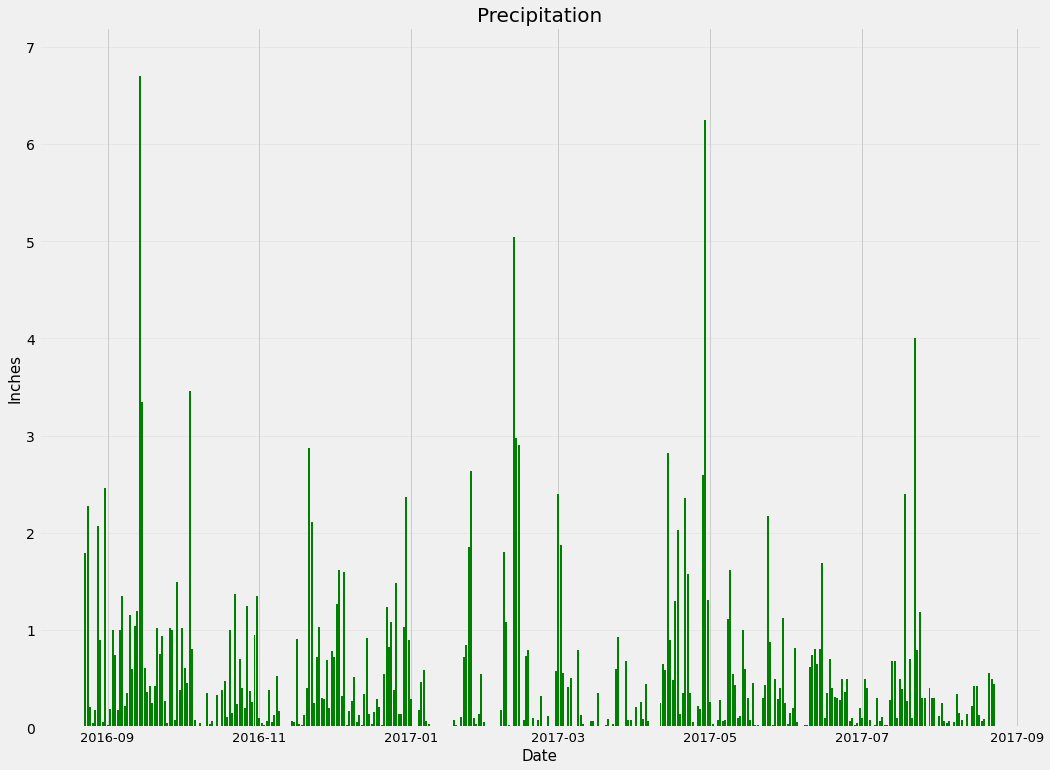

In [65]:
# Use Pandas Plotting with Matplotlib to plot the data

# step 1, get the data
x = df_sorted.date
y = df_sorted.prcp

# step 2, init the plot
fig = plt.figure(figsize=(16,12))
plt.bar(x, y,color="green")

# step 3, customization
plt.title("Precipitation", fontsize=20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Inches", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+0.5)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()


In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_sorted.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [74]:
query = "SELECT * from station;"
df_station = pd.read_sql(query, engine)
df_station.head(15)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [67]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [69]:
# number of stations
query = """
        SELECT
            count(*)
        FROM
            station
    
        """

engine.execute(query).fetchall()

[(9,)]

In [70]:
df_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [72]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

query = """
        SELECT
            count(m.id) as num_of_rows,
            s.station
            
        FROM
            measurement m
            JOIN station s on s.station=m.station
        GROUP BY 
            m. station
        ORDER BY 
            num_of_rows desc;
            
    
        """
df = pd.read_sql(query, engine)
df

,num_of_rows,station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
        SELECT
            s.station,
            m.tobs
           
        FROM
            measurement m
            JOIN station s on s.station=m.station
        WHERE
            s.station = 'USC00519281';
    
               
        """
df = pd.read_sql(query, engine)
df

,station,tobs
0,USC00519281,70.0
1,USC00519281,62.0
2,USC00519281,74.0
3,USC00519281,75.0
4,USC00519281,74.0
...,...,...
2767,USC00519281,77.0
2768,USC00519281,77.0
2769,USC00519281,76.0
2770,USC00519281,76.0


In [83]:
df.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [91]:
query = """
        SELECT
            station,
            min(tobs) as min,
            max(tobs) as max,
            avg(tobs) as avg
        FROM
            measurement m
        WHERE
            m. station = 'USC00519281'

        """


df = pd.read_sql(query, engine)
df

,station,min,max,avg
0,USC00519281,54.0,85.0,71.663781


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [103]:
# Query the last 12 months of temperature observation data for this station 
query = """
        SELECT
            m.station,
            m.date,
            m.tobs
            
        FROM
            measurement m
        WHERE
            m. station = 'USC00519281'
            AND m. date >='2016-08-23'
            AND m. tobs is not null
        ORDER BY
            m.date desc;

        """


df = pd.read_sql(query, engine)
df

,station,date,tobs
0,USC00519281,2017-08-18,79.0
1,USC00519281,2017-08-17,76.0
2,USC00519281,2017-08-16,76.0
3,USC00519281,2017-08-15,77.0
4,USC00519281,2017-08-14,77.0
...,...,...,...
347,USC00519281,2016-08-27,75.0
348,USC00519281,2016-08-26,80.0
349,USC00519281,2016-08-25,80.0
350,USC00519281,2016-08-24,77.0


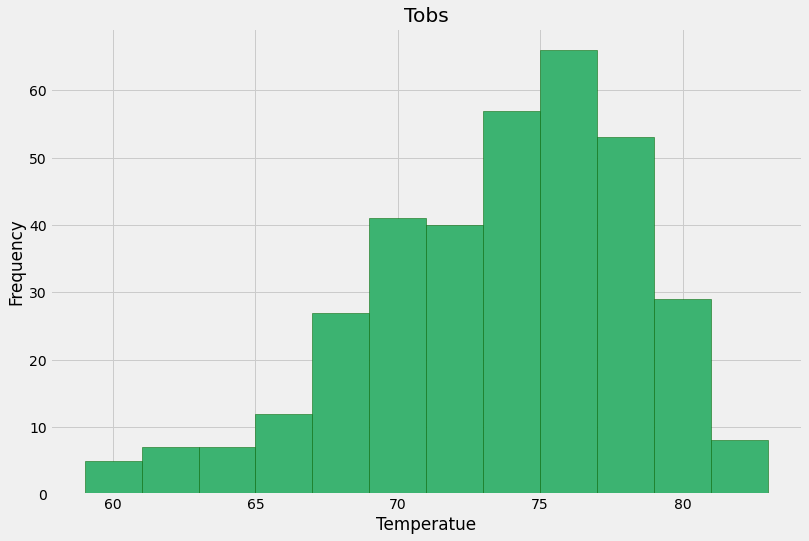

In [106]:
plt.figure(figsize=(12,8))
plt.hist(df.tobs, bins=12, color="mediumseagreen",label="tobs",edgecolor="darkgreen")
plt.title("Tobs")
plt.xlabel("Temperatue")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()